<a href="https://colab.research.google.com/github/wel51x/DS-Sprint-01-Dealing-With-Data/blob/master/module1-afirstlookatdata/LS_DS_111_A_First_Look_at_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - A First Look at Data



## Lecture - let's explore Python DS libraries and examples!

The Python Data Science ecosystem is huge. You've seen some of the big pieces - pandas, scikit-learn, matplotlib. What parts do you want to see more of?

In [0]:
# TODO - we'll be doing this live, taking requests
# and reproducing what it is to look up and learn things


<module 'latex' from '/usr/local/lib/python3.6/dist-packages/latex/__init__.py'>

## Assignment - now it's your turn

Pick at least one Python DS library, and using documentation/examples reproduce in this notebook something cool. It's OK if you don't fully understand it or get it 100% working, but do put in effort and look things up.

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# copied from https://nbviewer.jupyter.org/github/ipython/ipython/blob/master/examples/IPython%20Kernel/Rich%20Output.ipynb

from IPython.display import Image
img_url = 'http://www.lawrencehallofscience.org/static/scienceview/scienceview.berkeley.edu/html/view/view_assets/images/newview.jpg'

# by default Image data are embedded
Embed      = Image(img_url)

# if kwarg `url` is given, the embedding is assumed to be false
SoftLinked = Image(url=img_url)

# In each case, embed can be specified explicitly with the `embed` kwarg
# ForceEmbed = Image(url=img_url, embed=True)

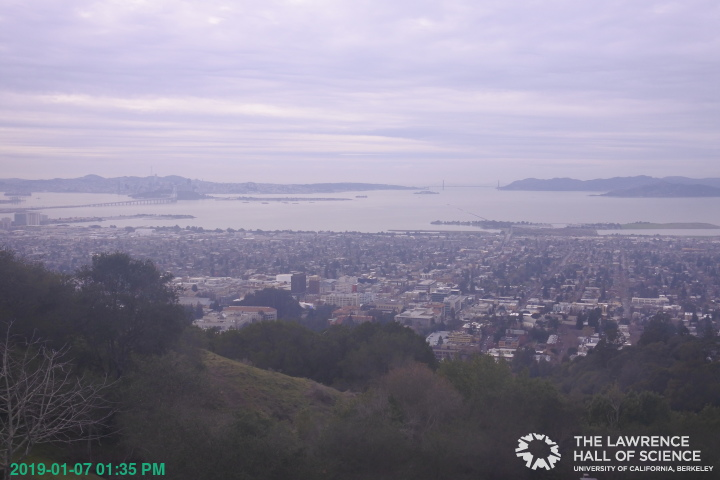

In [0]:
Embed

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'lw'
  s)


(-4.0, 3.99, -1.0, 2.99)

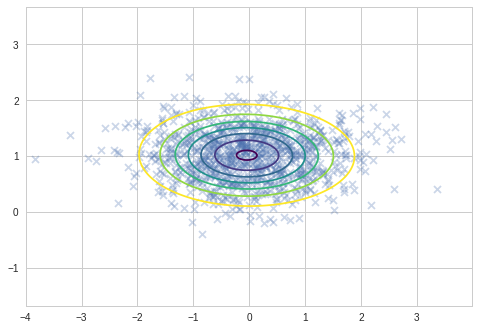

In [2]:
# remainder filched from https://nbviewer.jupyter.org/github/lmarti/evolutionary-computation-course/blob/master/AEC.04%20-%20Evolutionary%20Strategies%20and%20Covariance%20Matrix%20Adaptation.ipynb

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm 
from mpl_toolkits.mplot3d import axes3d
from scipy.stats import norm, multivariate_normal
import math
#import latex

%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
#plt.rcParams['text.latex.preamble'] ='\\usepackage{libertine}\n\\usepackage[utf8]{inputenc}'

import seaborn
seaborn.set(style='whitegrid')
seaborn.set_context('notebook')

mu = [0,1]
cov = [[1,0],[0,0.2]] # diagonal covariance, points lie on x or y-axis
sample = np.random.multivariate_normal(mu,cov,1000).T
plt.scatter(sample[0], sample[1], marker='x', alpha=0.29)

estimated_mean = sample.mean(axis=1)
estimated_cov = np.cov(sample)
e_x,e_y = np.random.multivariate_normal(estimated_mean,estimated_cov,500).T

plt.plot(e_x,e_y,'rx', alpha=0.47)
x, y = np.mgrid[-4:4:.01, -1:3:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = multivariate_normal(estimated_mean, estimated_cov)
plt.contour(x, y, rv.pdf(pos), cmap=cm.viridis_r, lw=4)
plt.axis('equal')

(-4.3995, 4.3895, -1.1995, 3.1895000000000002)

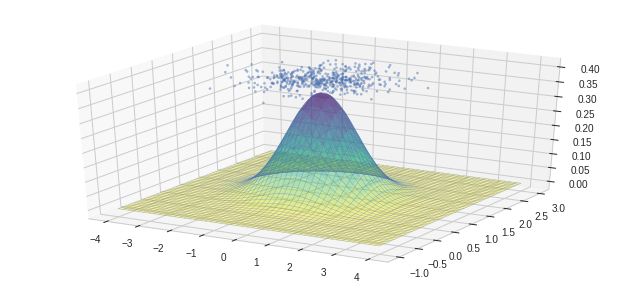

In [3]:
fig = plt.figure(figsize=(11,5))
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, rv.pdf(pos), cmap=cm.viridis_r, rstride=30, cstride=10, linewidth=1, alpha=0.47)
ax.plot_wireframe(x, y, rv.pdf(pos), linewidth=0.47, alpha=0.47)
ax.scatter(e_x, e_y, 0.4, marker='.', alpha=0.47)
ax.axis('tight')

In [0]:
#!pip3 install deap

import array, random, time, copy

from deap import base, creator, benchmarks, tools, algorithms

random.seed(42) # Fixing a random seed: You should not do this in practice.

def plot_problem_3d(problem, bounds, resolution=100., 
                    cmap=cm.viridis_r, rstride=10, cstride=10, 
                    linewidth=0.15, alpha=0.65, ax=None):
    'Plots a given deap benchmark problem in 3D mesh.'
    (minx,miny),(maxx,maxy) = bounds
    x_range = np.arange(minx, maxx, (maxx-minx)/resolution)
    y_range = np.arange(miny, maxy, (maxy-miny)/resolution)
    
    X, Y = np.meshgrid(x_range, y_range)
    Z = np.zeros((len(x_range), len(y_range)))
    
    for i in range(len(x_range)):
        for j in range(len(y_range)):
            Z[i,j] = problem((x_range[i], y_range[j]))[0]
    
    if not ax:
        fig = plt.figure(figsize=(11,6))
        ax = fig.gca(projection='3d')
        
    cset = ax.plot_surface(X, Y, Z, cmap=cmap, rstride=rstride, cstride=cstride, linewidth=linewidth, alpha=alpha)
    
def plot_problem_controur(problem, bounds, optimum=None,
                          resolution=100., cmap=cm.viridis_r, 
                          rstride=1, cstride=10, linewidth=0.15,
                          alpha=0.65, ax=None):
    'Plots a given deap benchmark problem as a countour plot'
    (minx,miny),(maxx,maxy) = bounds
    x_range = np.arange(minx, maxx, (maxx-minx)/resolution)
    y_range = np.arange(miny, maxy, (maxy-miny)/resolution)
    
    X, Y = np.meshgrid(x_range, y_range)
    Z = np.zeros((len(x_range), len(y_range)))
    
    for i in range(len(x_range)):
        for j in range(len(y_range)):
            Z[i,j] = problem((x_range[i], y_range[j]))[0]
    
    if not ax:
        fig = plt.figure(figsize=(6,6))
        ax = fig.gca()
        ax.set_aspect('equal')
        ax.autoscale(tight=True)
    
    cset = ax.contourf(X, Y, Z, cmap=cmap, rstride=rstride, cstride=cstride, linewidth=linewidth, alpha=alpha)
    
    if optimum:
        ax.plot(optimum[0], optimum[1], 'bx', linewidth=4, markersize=15)

def plot_cov_ellipse(pos, cov, volume=.99, ax=None, fc='lightblue', ec='darkblue', alpha=1, lw=1):
    ''' Plots an ellipse that corresponds to a bivariate normal distribution.
    Adapted from http://www.nhsilbert.net/source/2014/06/bivariate-normal-ellipse-plotting-in-python/'''
    from scipy.stats import chi2
    from matplotlib.patches import Ellipse

    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    if ax is None:
        ax = plt.gca()

    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    kwrg = {'facecolor':fc, 'edgecolor':ec, 'alpha':alpha, 'linewidth':lw}

    # Width and height are "full" widths, not radius
    width, height = 2 * np.sqrt(chi2.ppf(volume,2)) * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwrg)
    ax.add_artist(ellip)

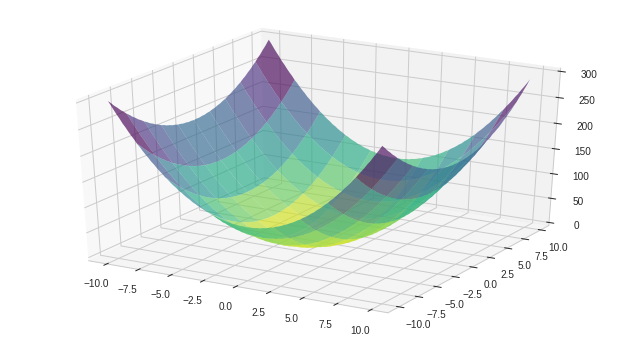

In [10]:
plot_problem_3d(benchmarks.bohachevsky, ((-10,-10), (10,10)))

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.

==>> after trying to get an interesting graph running, and failing because of a likely environment/config latex issue, I finally got this bit (display the current view from LBL) running.

2.  What was the most challenging part of what you did?

==>> trying to get the first app running. Anyone aware of issues with LaTeX in colab?

3.  What was the most interesting thing you learned?

==>> software continues to be fragile

4.  What area would you like to explore with more time?

==>> If I get time, going to see if I can get the first app running in Anaconda



## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub (and since this is the first assignment of the sprint, open a PR as well).

- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
- [matplotlib documentation](https://matplotlib.org/contents.html)
- [Awesome Data Science](https://github.com/bulutyazilim/awesome-datascience) - a list of many types of DS resources

Stretch goals:

- Find and read blogs, walkthroughs, and other examples of people working through cool things with data science - and share with your classmates!
- Write a blog post (Medium is a popular place to publish) introducing yourself as somebody learning data science, and talking about what you've learned already and what you're excited to learn more about